## Predição de Churn de Clientes
### O original encontra-se disponível [aqui](https://github.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition).

#### Você trabalha em um banco multinacional que pretende aumentar sua participação de mercado na Europa. Recentemente, o número de clientes que usam serviços bancários diminuiu e o banco está preocupado com o fato de os clientes existentes terem parado de usá-los como seu banco principal. Como cientista de dados, você tem a tarefa de descobrir as razões por trás da rotatividade de clientes e prever a rotatividade futura de clientes. A equipe de marketing está interessada em suas descobertas e deseja entender melhor o comportamento do cliente existente e possivelmente prever a rotatividade de clientes no futuro. Seus resultados ajudarão a equipe de marketing a usar seu orçamento com sabedoria para atingir potenciais churners.

In [ ]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados com o pandas

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter07/Exercise7.08/Churn_Modelling.csv')
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


#### Tenure é a duração de quanto tempo o cliente está associado ao fornecedor.

In [ ]:
len(data)

10000

In [ ]:
data.shape

(10000, 12)

## Fazendo EDA e limpeza e ajustes dos dados

In [ ]:
data.isnull().values.any()

True

In [ ]:
## Há valores nulos nas colunasGEnder, Age e EstimatedSalary
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [ ]:
data[["EstimatedSalary","Age"]].describe()


,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [ ]:
data.describe()
#### Parece que a coluna HasCrCard tem valores binários (0 e 1), então precisa ser alterado para o tipo categórico

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
## Quantidade de NaN presentes
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [ ]:
## Porcentagem de NaN presentes
round(data.isnull().sum()/len(data)*100,2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [ ]:
## Checking the datatype of the missing columns
data[["Gender","Age","EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

### Existem 3 maneiras de resolver o problema de valores NaN:
1. Removendo as linhas contendo valores NaN
2. Preencher os valores NaN com alguma medida estatística (media, mediana, moda) 
3. Predizer os valores usando um algoritmo de ML

In [46]:
mean_value=data['EstimatedSalary'].mean() 
data['EstimatedSalary']=data['EstimatedSalary'].fillna(mean_value) 

In [47]:
data['Gender'].value_counts()

2    5453
1    4543
0       4
Name: Gender, dtype: int64

In [48]:
data['Gender']=data['Gender'].fillna(data['Gender']\
                .value_counts().idxmax()) 

In [49]:
data['Age'].mode()
mode_value=data['Age'].mode()
data['Age']=data['Age'].fillna(mode_value[0])

In [50]:
##checando valores NaN

data.isnull().any()

CustomerId         False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Churn              False
dtype: bool

### Renomeando as colunas

In [51]:
data = data.rename(columns={'CredRate': 'CreditScore', 'ActMem' : 'IsActiveMember', 'Prod Number': 'NumOfProducts', 'Exited':'Churn'}) 
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

### Vamos a coluna churn para o extremo direito. E também remover a coluna CustomerId. Por que?

In [52]:
data.drop(labels=['CustomerId'], axis=1,inplace = True)

In [53]:
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1,inplace = True)
data.insert(len(data.columns), 'Churn', column_churn.values)

In [54]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

### Convertendo tipos para category

In [55]:
data["Geography"] = data["Geography"].astype('category') 
data["Gender"] = data["Gender"].astype('category') 
data["HasCrCard"] = data["HasCrCard"].astype('category') 
data["Churn"] = data["Churn"].astype('category') 
data["IsActiveMember"] = data["IsActiveMember"].astype('category') 

In [56]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

## Visão geral estatística

In [ ]:
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['Churn'].value_counts(normalize=False)

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
data['Churn'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Churn, dtype: float64

In [ ]:
data['IsActiveMember'].value_counts(normalize=True)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.744083
std,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.269099
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
summary_churn = data.groupby('Churn')
summary_churn.mean()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Churn,,,,,,,,,
0,1.569117e+07,651.853196,37.411587,5.033279,72745.296779,1.544267,0.707146,0.554565,99718.932023
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [ ]:
summary_churn.median()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Churn,,,,,,,,,
0,15691543.0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,15688963.0,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
CustomerId,1.000000,0.005308,0.009704,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015272,-0.006248
CreditScore,0.005308,1.000000,-0.004214,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001352,-0.027094
Age,0.009704,-0.004214,1.000000,-0.009942,0.028086,-0.030571,-0.011761,0.085301,-0.007248,0.285225
Tenure,-0.014883,0.000842,-0.009942,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007407,-0.014001
Balance,-0.012419,0.006268,0.028086,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.013129,0.118533
NumOfProducts,0.016972,0.012238,-0.030571,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014132,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011761,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009935,-0.007138
IsActiveMember,0.001665,0.025651,0.085301,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011471,-0.156128
EstimatedSalary,0.015272,-0.001352,-0.007248,0.007407,0.013129,0.014132,-0.009935,-0.011471,1.000000,0.012234
Churn,-0.006248,-0.027094,0.285225,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012234,1.000000


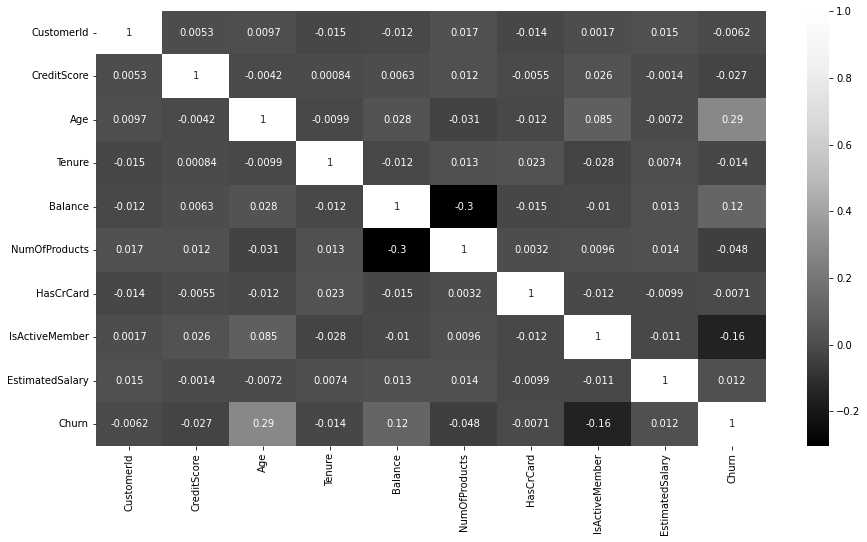

In [ ]:
corr = data.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,cmap='Greys_r') 
corr 

## Visualização

Text(0, 0.5, 'No of Customers')

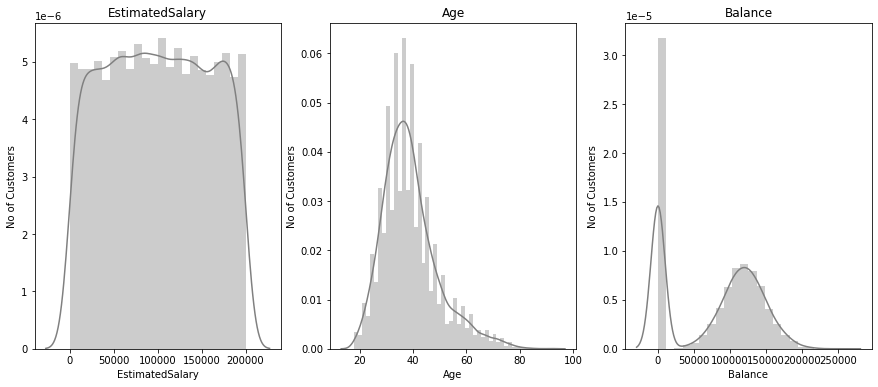

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 

sns.distplot(data.EstimatedSalary, kde=True, color="gray", ax=axes[0]).set_title('EstimatedSalary') 
axes[0].set_ylabel('No of Customers') 

sns.distplot(data.Age, kde=True, color="gray", ax=axes[1]).set_title('Age') 
axes[1].set_ylabel('No of Customers') 

sns.distplot(data.Balance, kde=True, color="gray", ax=axes[2]).set_title('Balance') 
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

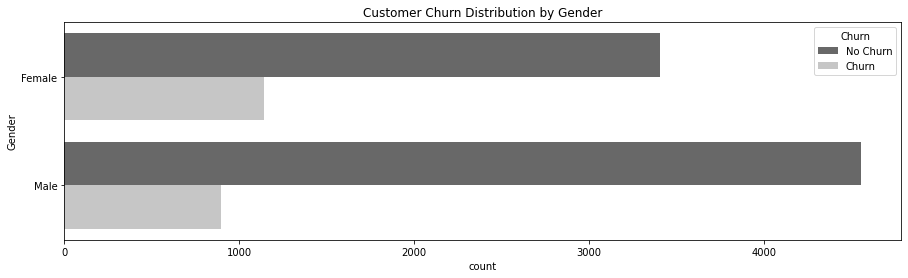

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Gender", hue='Churn', data=data, palette="Greys_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

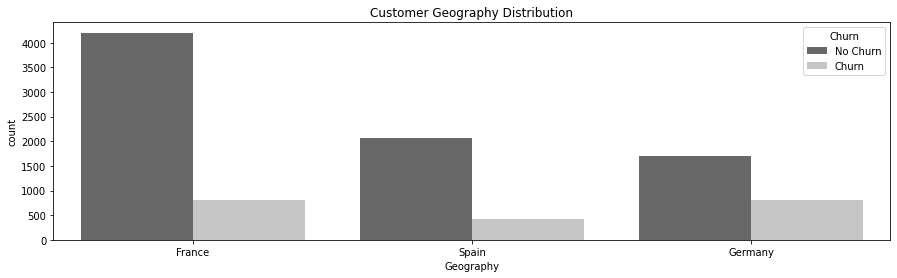

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(x='Geography', hue='Churn', data=data, palette="Greys_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

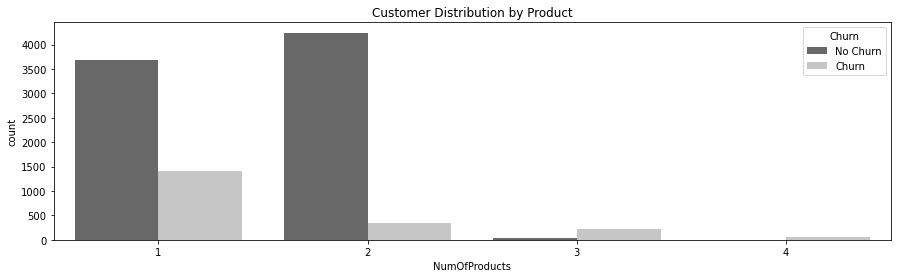

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(x='NumOfProducts', hue='Churn', data=data, palette="Greys_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

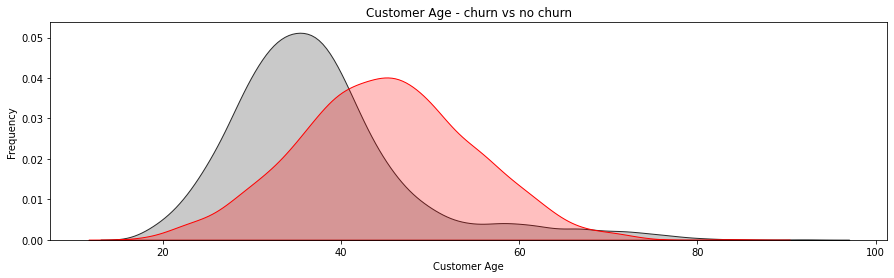

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , \
               color=sns.color_palette("Greys_r")[0],\
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , \
               color="red",\
               shade=True, label='churn') 
ax.set(xlabel='Customer Age', ylabel='Frequency') 
plt.title('Customer Age - churn vs no churn') 

Text(0.5, 1.0, 'Customer Balance - churn vs no churn')

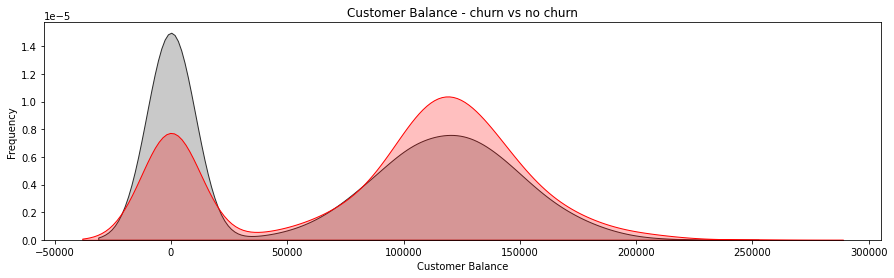

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , \
               color=sns.color_palette("Greys_r")[0],\
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , \
               color="red",\
               shade=True, label='churn') 
ax.set(xlabel='Customer Balance', ylabel='Frequency') 
plt.title('Customer Balance - churn vs no churn')

Text(0.5, 1.0, 'Customer CreditScore - churn vs no churn')

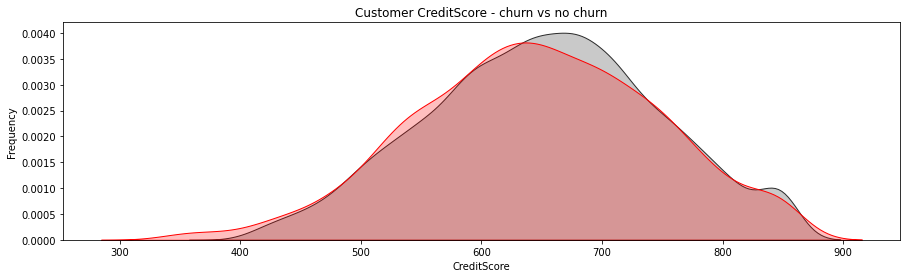

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , \
               color=sns.color_palette("Greys_r")[0],\
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , \
               color="red",\
               shade=True, label='churn') 
ax.set(xlabel='CreditScore', ylabel='Frequency') 
plt.title('Customer CreditScore - churn vs no churn') 

Text(0.5, 1.0, 'Number of Product VS Balance')

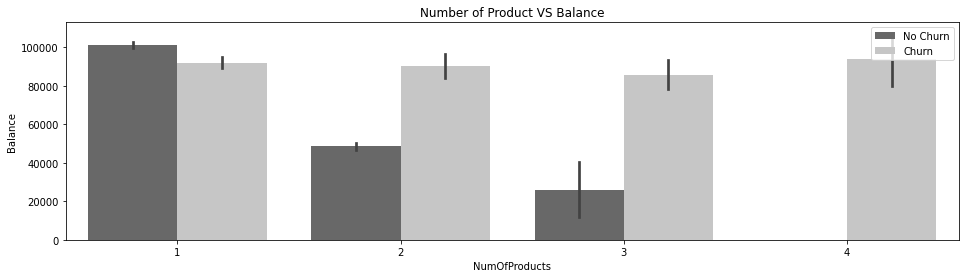

In [ ]:
plt.figure(figsize=(16,4)) 
p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn', data=data, palette="Greys_r") 
p.legend(loc='upper right') 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Number of Product VS Balance') 

## Seleção de Feature

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [41]:
data.dtypes

CustomerId           int64
CreditScore          int64
Geography             int8
Gender                int8
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard             int8
IsActiveMember       int64
EstimatedSalary    float64
Churn                 int8
dtype: object

In [57]:
### Encoding the categorical variables
data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes
data["HasCrCard"] = data["HasCrCard"].astype('category').cat.codes
data["Churn"] = data["Churn"].astype('category').cat.codes

In [58]:
target = 'Churn'
X = data.drop('Churn', axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y) 

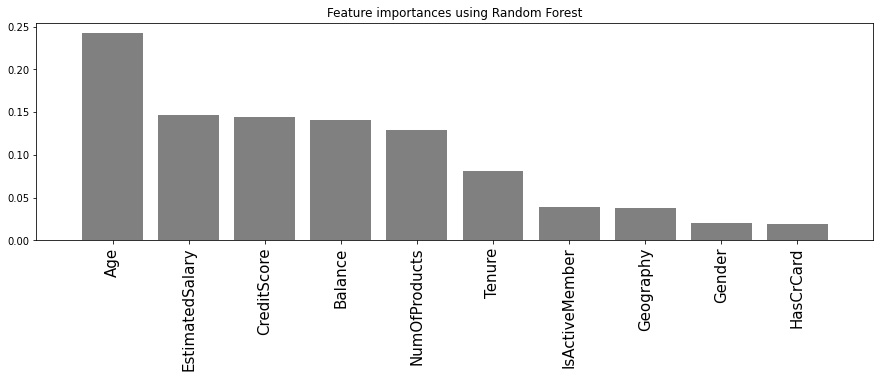

In [59]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices],\
        color="gray", align="center") 
plt.xticks(range(X_train.shape[1]), features[indices], \
           rotation='vertical',fontsize=15) 
plt.xlim([-1, X_train.shape[1]])
plt.show() 

In [60]:
feature_importance_df = pd.DataFrame({"Feature":features, "Importance":importances}) 

In [61]:
print(feature_importance_df)

           Feature  Importance
0      CreditScore    0.144435
1        Geography    0.038339
2           Gender    0.019664
3              Age    0.242206
4           Tenure    0.080860
5          Balance    0.140849
6    NumOfProducts    0.128781
7        HasCrCard    0.019169
8   IsActiveMember    0.039053
9  EstimatedSalary    0.146643


## Fit do modelo

In [64]:
import statsmodels.api as sm 

top5_features = ['Age','EstimatedSalary','CreditScore',\
                 'Balance','NumOfProducts'] 
logReg = sm.Logit(y_train, X_train[top5_features]) 
logistic_regression = logReg.fit() 

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [65]:
logistic_regression.summary
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [68]:
# Create function to compute coefficients
coef = logistic_regression.params
def y (coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts) : 
  return coef[0]*Age + coef[1]*EstimatedSalary + coef[2]*CreditScore + coef[3]*Balance + coef[4]*NumOfProducts 

In [70]:
import numpy as np

#A customer having below attributes
#Age: 50
#EstimatedSalary: 100,000 
#CreditScore: 600
#Balance: 100,000
#NumOfProducts: 2
#would have 38% chance of churn

y1 = y(coef, 50, 100000, 600,100000,2)
p = 1 / (1+np.exp(-y1))
p

0.3093646023640835

## Logistic regression using scikit-learn

In [71]:
from sklearn.linear_model import LogisticRegression

In [75]:
clf = LogisticRegression(random_state=0, solver='lbfgs')\
      .fit(X_train[top5_features], y_train) 

In [76]:
clf.predict(X_test[top5_features])
clf.predict_proba(X_test[top5_features])

array([[0.61565033, 0.38434967],
       [0.76717157, 0.23282843],
       [0.78137389, 0.21862611],
       ...,
       [0.552548  , 0.447452  ],
       [0.85311964, 0.14688036],
       [0.75851722, 0.24148278]])

In [77]:
clf.score(X_test[top5_features], y_test)

0.79